<h2><strong>Credit Card Data Analysis - EDA</strong></h2>
<hr>

In [1]:
# Lbraries used for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Reading the Data from local drive useing Pandas
df=pd.read_csv("eda 1.csv",index_col='ID')

In [3]:
# Checking the Values of the Data
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
# Checking the Data types of the columns
df.dtypes

Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [5]:
#Checking for null values
df.isnull().sum()/len(df)*100

Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [6]:
# Using Describe to Calaculate the Min, Max ,Quaters etc
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [7]:
# Finding the Unique variables in Each Columns
df.nunique()

Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [8]:
[col for col in df.columns if df[col].dtype=='object']

['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

In [9]:
[col for col in df.columns if df[col].dtype!='object']

['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']

In [10]:
# Seperating Numeriacl and Categorical Columns

numerical_col=['Age', 'Vintage', 'Avg_Account_Balance']

categorical_col=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']

In [11]:
# Finding Coorelation 
df.corr()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


<AxesSubplot:>

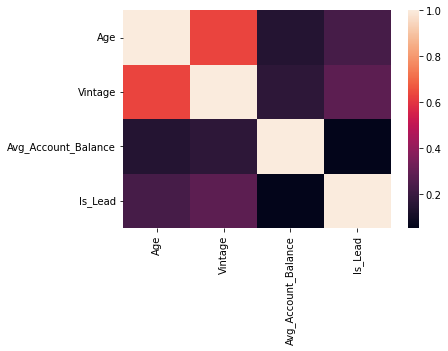

In [12]:
# Heat Map of Correlarion 
sns.heatmap(df.corr())

## Univariente Plots

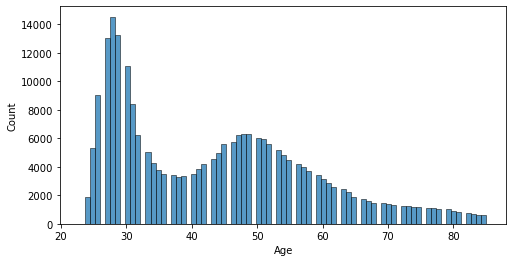

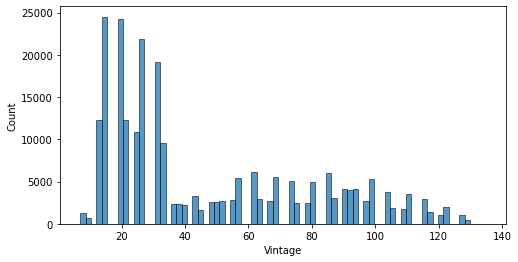

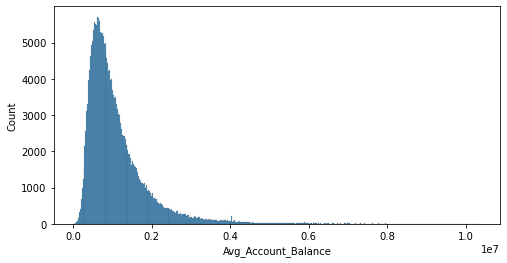

In [13]:
# Univarient plots in Numerical Variables
for col in numerical_col:
    plt.figure(figsize=(8,4))
    sns.histplot(x=col,data=df)
    plt.show()

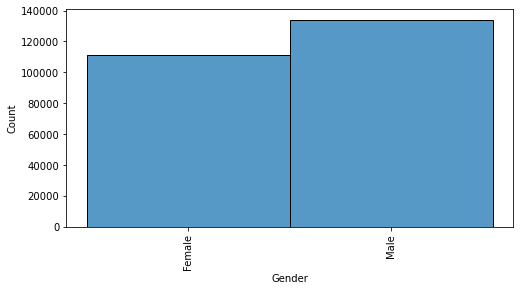

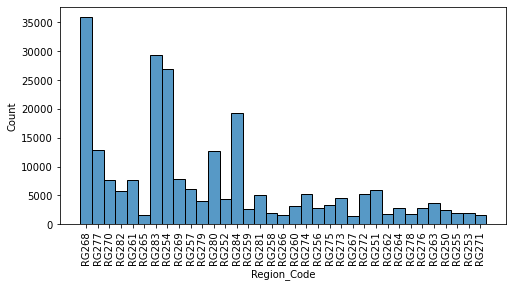

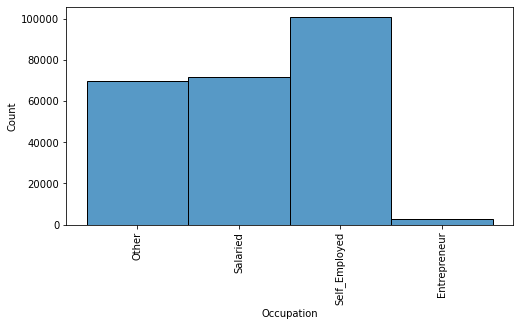

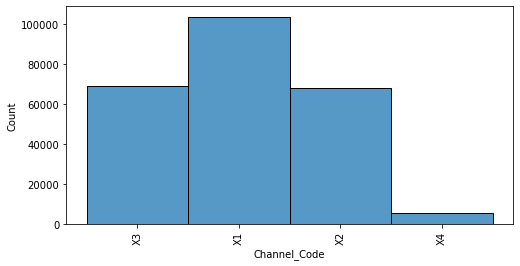

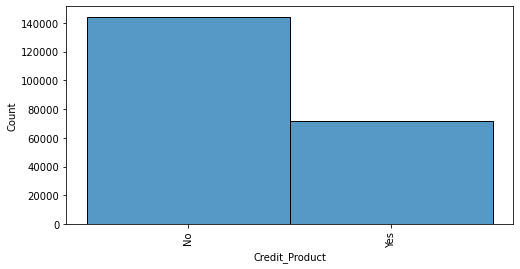

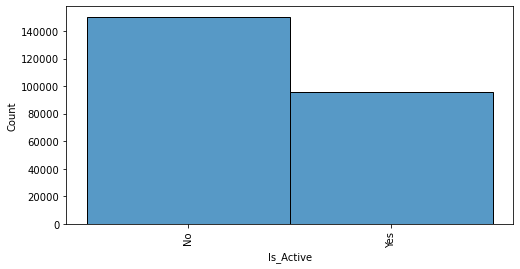

In [14]:
# Univarient plots in Categorical Variables
for col in categorical_col:
    plt.figure(figsize=(8,4))
    sns.histplot(x=col,data=df)
    plt.xticks(rotation=90)
    plt.show()

## Bivarient Analysis

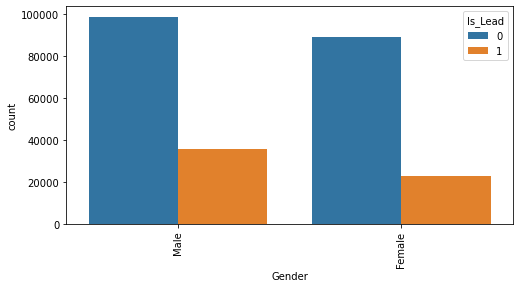

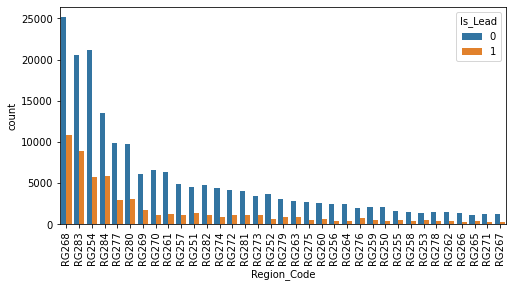

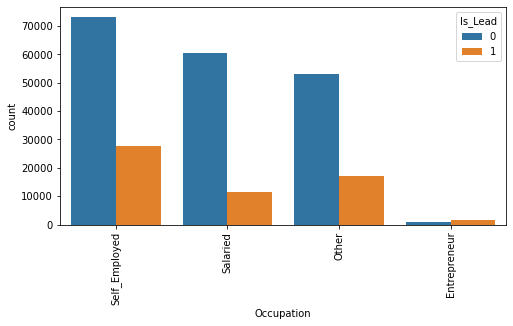

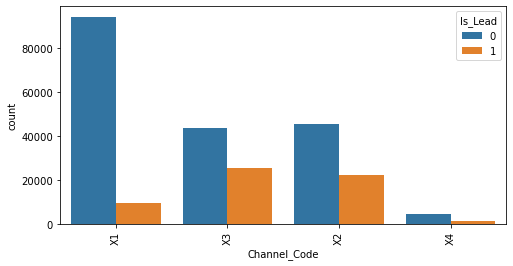

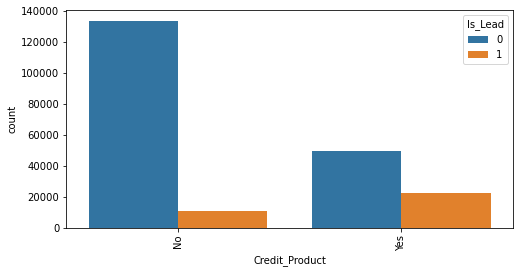

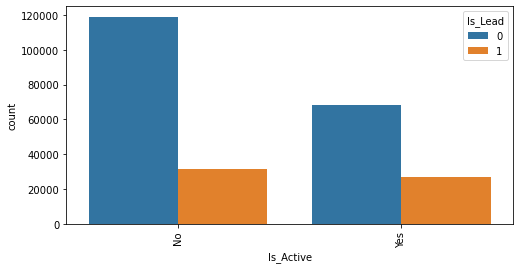

In [15]:
#Bivarient plots in Categorical Variables
for col in categorical_col:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col],hue=df['Is_Lead'],orient="h",order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

Target Class is Biased
<br>
-By Above Plots we can see the Distribution of Categorial Variables with Target Variables

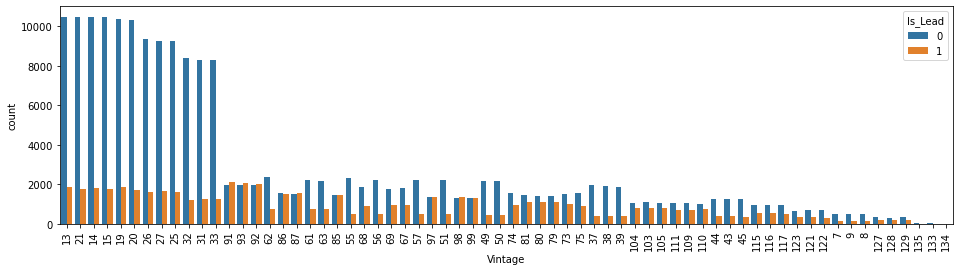

In [16]:
# Distribution of lead with respect to Vintage  
plt.figure(figsize=(16,4))
sns.countplot(df['Vintage'],hue=df['Is_Lead'],orient="h",order=df['Vintage'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [17]:
df['Is_Lead'].value_counts().index

Int64Index([0, 1], dtype='int64')

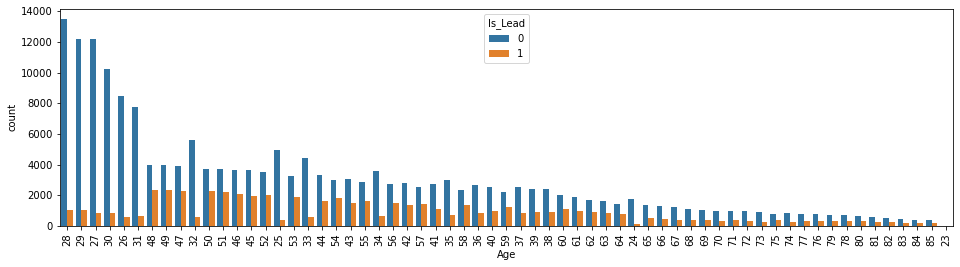

In [18]:
# Distribution of lead with respect to Age  
plt.figure(figsize=(16,4))
sns.countplot(df['Age'],hue=df['Is_Lead'],orient="h",order=df['Age'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

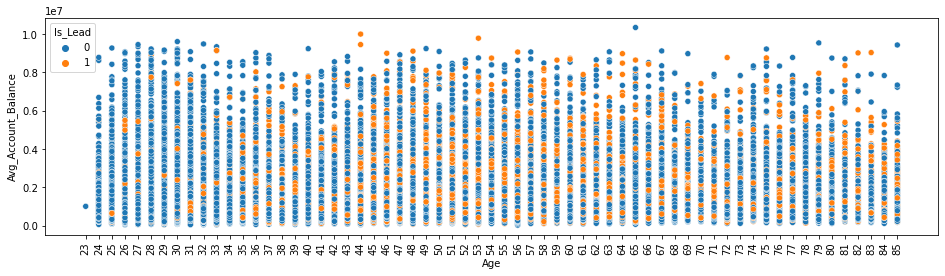

In [19]:
# Distribution of Age v/s Average account Balance with Lead
plt.figure(figsize=(16,4))
sns.scatterplot(x=df.Age,y=df.Avg_Account_Balance,hue=df.Is_Lead)
plt.xticks(ticks=df.Age.unique(),rotation=90)
plt.show()

## Lead and Not Lead with Gender of Customer

<AxesSubplot:xlabel='Is_Lead'>

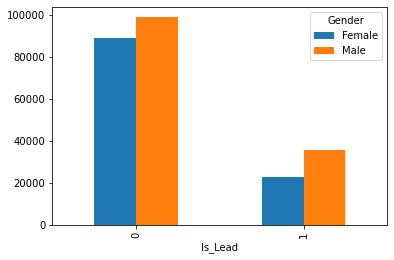

In [20]:
pd.crosstab(index=df.Is_Lead,columns=df.Gender).plot.bar()

## Lead and Not Lead with Age of Customer

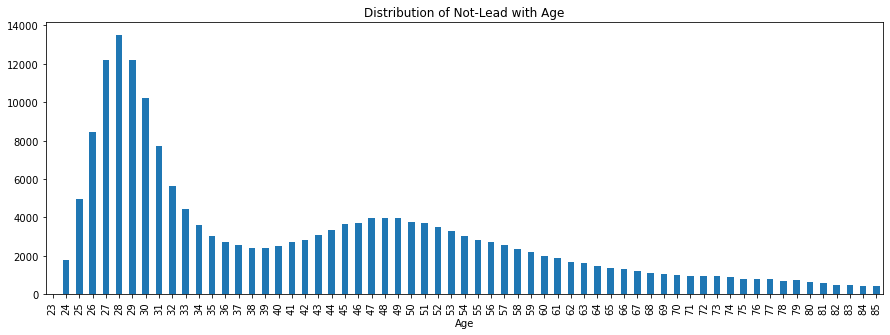

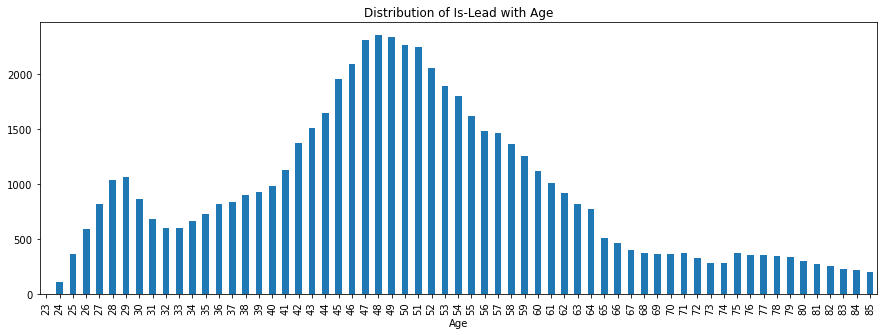

In [21]:
age_lead=pd.crosstab(index=df.Is_Lead,columns=df.Age)

for i in range(len(age_lead)):
    plt.figure(figsize=(15,5))
    if (i==0):
        age_lead.iloc[i].plot.bar()
        plt.title('Distribution of Not-Lead with Age')
        plt.show()
    else:
        age_lead.iloc[i].plot.bar()
        plt.title('Distribution of Is-Lead with Age')
        plt.show()

<AxesSubplot:xlabel='Age', ylabel='Is_Lead'>

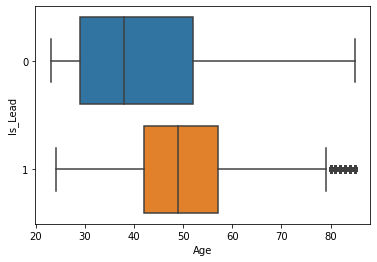

In [22]:
sns.boxplot(y=df.Is_Lead,x=df.Age,orient='h')

## Lead and Not Lead with Region_Code of Customer

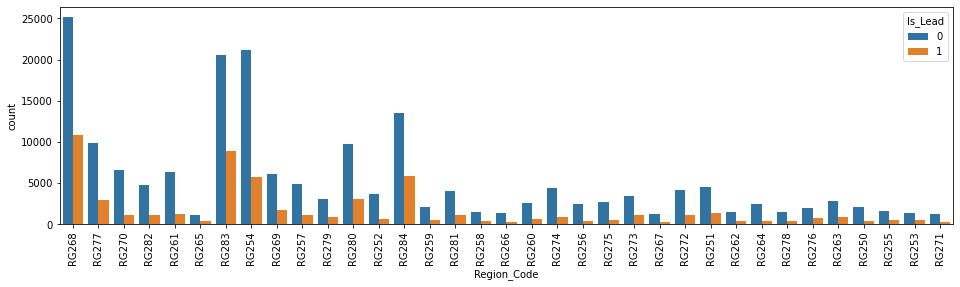

In [23]:
plt.figure(figsize=(16,4))
sns.countplot(df['Region_Code'],hue=df['Is_Lead'],orient="h")
plt.xticks(rotation=90)
plt.show()

### Checking For Outilirers 

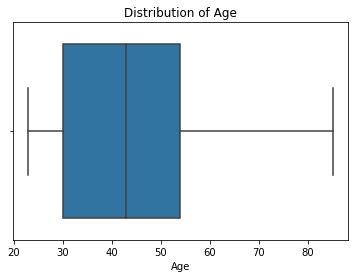

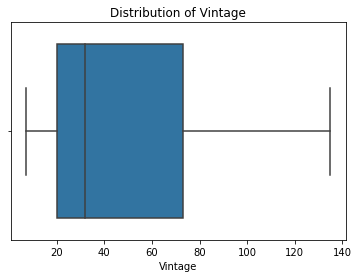

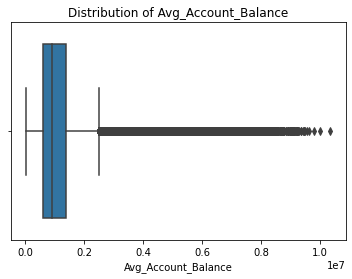

In [24]:
for i in numerical_col:
    sns.boxplot(df[i])
    plt.title(f'Distribution of {i}')
    plt.show()

Conclusion:
<br>
<h3>Who are Intrested to taking these credit cards </h3>
Customers with Below Range are more intrested in Taking the Credit Card
<ul>
*Gender- Male <br>
*Age- 45 to 55<br>
*Region- ['RG268','RG283','RG254','RG284'] <br>
*Channel Code - X2,X3<br>
*Vintage- 91,92,93 